# Making a map using the on-demand mapping services for a basemap and super-imposing some data

## Background 

The most familiar mapping services are those we often use to navigate with our phones for example: google maps. The difference between google maps and many of the examples we have looked at so far is that we do not download data in advance, process it and then create a map. Instead we have access to data when we need it and a a _relevant_ resolution. If we want to make a global map that is 1000 pixels across then Australia is probably just a few dozen pixels wide. If we instead decide to make a map to navigate across Melbourne, then a much higher resolution is needed _but only within the boundary of the map_. 

`Cartopy` provides access to various of the online mapping services that will serve image data on demand in the form of small image tiles at a specified resolution. The tools automatically query the service and assemble the tiles to make the map but there are some tricks that we need to know before we can use them.

## Exercise

This notebook is a template that needs to have some functions defined that it can use to plot the map.

Your job is to provide those functions so that this notebook will work. You are not going to change this notebook at all !

In [1]:
from src.dependencies import *
from src.my_functions import *

In [2]:
display_markdown(my_documentation(), raw=True)

 
This markdown function returns a document that explains what the program achieves. 
    
# Plotting the Map

This notebook is programmed to give us a high-resolution map of the Japanese mainland, containing information about the coastlines, water features, location of earthquake events for the specifoed time range, the sea floor age and finally the topography on the main basemap. Further information about how all of these were achieved is explained below.
    
##  Basemap

First and foremost, it is a known fact that to produce a basemap, we need image tiles. We manage to do that using the 'cartopy' package, which uses the function to gather access to various sources that would help us in providing these image tiles.
The [Mapbox](https://docs.mapbox.com/api/maps/styles/) provides us with a lot of map styles to choose from, depending on the purpose of our function. In our program, we make use of the **Mapbox outdoors** style, simply to make our natural features, topopraphy as well as roadways and built features standout vividly. However, we do need to login into the mapbox [website](https://docs.mapbox.com/api/maps/styles/) to get the necessary `access_token`.

The full list of image tiles and their sources can be found in the source code in [Github](https://github.com/SciTools/cartopy/blob/master/lib/cartopy/io/img_tiles.py).

## Coastlines and water features

Adding coastlines and other water features like lakes, rivers and the ocean to the basemap is our next objective. The `cartopy.feature.NaturalEarthFeature` code gives us the necessary interfaces to acquire them at a specified resolution, i.e. ‘10m’, ‘50m’, or ‘110m’, which corresponds to a scale of 1:10,000,000, 1:50,000,000, and 1:110,000,000 respectively. For the purpose of our program, we plot the coastlines at a resolution of '10m' and the water features at a resolution of '50m'.

## Earthquake events 

Earthquakes that occurred in the specified region between the time period specified are collected and used in making the map. In this notebook, the specified region is of Japan, and the specified time is 6 months, between 01/01/2011 to 30/06/2011. These records are fed into the program as point data from the **IRIS** (Incorporated Research Institution for Seismology) database, by availing the aid of the functions from the `obspy` package. Each of the point datum consists of 4 parameters: the longitude, the latitude, the depth of the origin and the magnitude of the earthquake.

## Seafloor Age

Data pertaining to the age of the sea floor are stored on `Cloudstor`, which provides cloud storage service helping people anywhere in the world tp upload and download data. Seafloor age information is displayed on the map applying a diverging colormap from red to blue.



## The code !

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Specify a region of interest

lat0 =  30  ; lat1 = 50
lon0 =  125; lon1 = 155

map_extent = [lon0, lon1, lat0, lat1]
basemap_name = "mapbox_outdoors"

In [5]:
coastline = my_coastlines("10m")
water_features = my_water_features("50m")

In [6]:
map_tiles_dictionary = my_basemaps()

In [7]:
point_data = my_point_data(map_extent)

print(point_data)

Point data: 309 events in catalogue
[[1.426623e+02 4.200610e+01 5.270000e+04 5.400000e+00]
 [1.424621e+02 3.997630e+01 3.210000e+04 6.700000e+00]
 [1.429081e+02 4.001280e+01 3.400000e+04 5.700000e+00]
 ...
 [1.402818e+02 3.144940e+01 9.820000e+04 5.400000e+00]
 [1.413351e+02 3.718150e+01 3.920000e+04 5.400000e+00]
 [1.422305e+02 3.157330e+01 2.880000e+04 5.600000e+00]]


In [8]:
raster = my_global_raster_data()

print(raster)

Cloudstore connection established
Remote and local file size both 21.99 MB, skipping - global_age_data.3.6.z.npz
[[[-180.         90.         55.569202]
  [-179.9        90.         55.56879 ]
  [-179.8        90.         55.568138]
  ...
  [ 179.8        90.         55.416157]
  [ 179.9        90.         55.416164]
  [ 180.         90.         55.41626 ]]

 [[-180.         89.9        55.370914]
  [-179.9        89.9        55.371075]
  [-179.8        89.9        55.361431]
  ...
  [ 179.8        89.9        55.363701]
  [ 179.9        89.9        55.363701]
  [ 180.         89.9        55.3643  ]]

 [[-180.         89.8        55.566631]
  [-179.9        89.8        55.547897]
  [-179.8        89.8        55.605961]
  ...
  [ 179.8        89.8        55.555347]
  [ 179.9        89.8        55.561535]
  [ 180.         89.8        55.566044]]

 ...

 [[-180.        -89.8              nan]
  [-179.9       -89.8              nan]
  [-179.8       -89.8              nan]
  ...
  [ 179.8  

In [9]:
## specify some shapefile data (?)

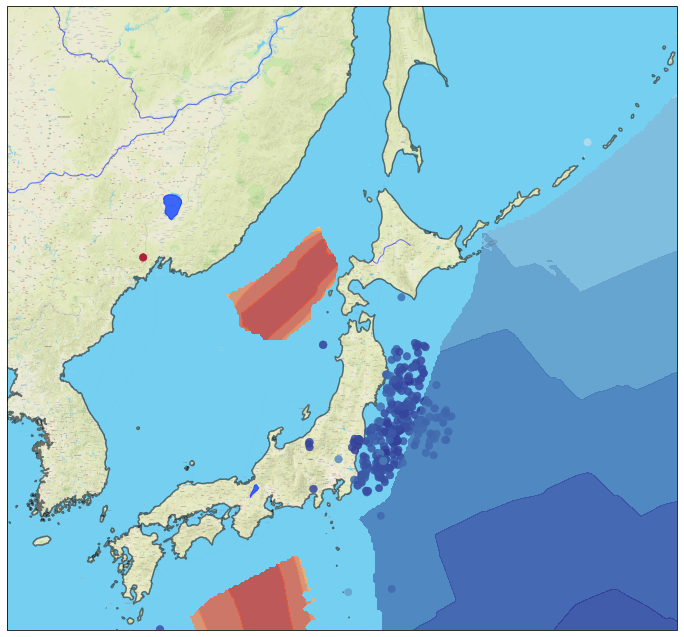

In [10]:
map_tiles = map_tiles_dictionary[basemap_name]

fig = plt.figure(figsize=(12, 12), facecolor="none")

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)
# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 

ax.add_image(map_tiles, 8)
ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black", zorder=1, alpha=0.5)
for feature in water_features:
    ax.add_feature(feature,    linewidth=1.0,  edgecolor="Blue",  zorder=2, alpha=0.5)
    
## Add point data (lon, lat,colormapped variable, size variable)
ax.scatter(point_data[:,0], point_data[:,1], 10.0* point_data[:,3], c=point_data[:,2], marker='o', 
               cmap=cm.RdYlBu_r, alpha = 0.85, linewidth=0.5, transform=ccrs.Geodetic())


## Add raster data as contours

cf = ax.contourf(raster[:,:,0], raster[:,:,1], raster[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.75)



In [11]:
fig.savefig("Japan_Earthquake_Map.png", dpi=600)

See how well that worked by opening the [full-size image](./LA_Basin_Map.png). 

There really is a lot of detail available, but you can also see how long it takes to download and build the different resolutions. There is something of an art to finding the right balance. 

You may also find that very high resolution output results in memory errors. If so, restart the kernel and try again with a small image or lower dpi.